# Laboratorio 1: Exploración y Visualización de Datos

Integrantes: **José Pablo Canalaes Maturana, Sebastián Ignacio Salas Lavado**


## Instrucciones

1.  Trabajen en equipos de dos personas. Salvo excepciones, no se corregirá entregas con menos de dos integrantes.

2.  Modifique este archivo `.ipynb` agregando sus respuestas donde corresponda.

3.  Para cada pregunta **incluya el código fuente que utilizó para llegar a su respuesta. Respuestas sin código no recibirán puntaje.**.

4.  El formato de entrega para esta actividad es un archivo **html**. **Genere un archivo HTML usando Jupyter** y súbalo a U-Cursos. Basta con que un/a integrante haga la entrega. Si ambos/as hacen una entrega en U-Cursos, se revisará cualquiera de éstas.


#### **Se recomienda fuertemente que no usen ChatGPT para resolver la actividad, ya que la experiencia de aprendizaje es mucho mayor si lo hacen por su cuenta.**

## Pongamonos en situación

Eres un **cientifico de datos** que trabaja en **Netflix**.

En los últimos años ha **crecido la cantidad usuarios que ven anime** en la plataforma, por lo que el equipo de contenido de Netflix ha decidido invertir en la producción de series de anime.

Tu jefe te ha pedido que **realices un análisis de los datos de las series de anime** para entender mejor el mercado y poder tomar decisiones informadas.

## Datos

Para realizar esta tarea, te han entregado un dataset con información de animes de la página **MyAnimeList** (MAL).

FUENTE: https://www.kaggle.com/datasets/azathoth42/myanimelist

Tenemos 2 archivos:
- `anime.csv`: Contiene 6 atributos: "title", "type", "source", "episodes", "airing" y "studio", que corresponden a información sobre el anime.
- `anime-stats.csv`: Contiene 4 atributos: "title", "score", "members" (número de usuarios que tienen el anime en su lista) y "favorites", que corresponden a estadísticas sobre la popularidad de cada anime.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Para que la siguiente celda funcione, los archivos CSV deben estar en la misma carpeta que este notebook.

In [3]:
df_anime = pd.read_csv('anime.csv', encoding="UTF-8")
df_stats = pd.read_csv('anime-stats.csv', encoding="UTF-8")

También puedes cargarlos remotamente de un repositorio usando el link a los archivos:


In [4]:
df_anime = pd.read_csv('https://raw.githubusercontent.com/bacchus00/cositas/main/anime.csv', encoding="UTF-8")
df_stats = pd.read_csv('https://raw.githubusercontent.com/bacchus00/cositas/main/anime-stats.csv', encoding="UTF-8")

Cualquiera de estas 2 formas es válida para cargar los datos.

## Exploración básica


Para hacernos una idea de como se ven los datos, lo más usual es mostrar los primeros registros de cada dataset.

1. Muestre los primeros 5 registros de cada dataset.

In [5]:
df_anime.head()

,title,type,source,episodes,airing,studio
0,Inu x Boku SS,TV,Manga,12,False,David Production
1,Seto no Hanayome,TV,Manga,26,False,Gonzo
2,Shugo Chara!! Doki,TV,Manga,51,False,Satelight
3,Princess Tutu,TV,Original,38,False,Hal Film Maker
4,Bakuman. 3rd Season,TV,Manga,25,False,J.C.Staff


In [6]:
df_stats.head()

,title,score,members,favorites
0,Inu x Boku SS,7.63,283882,2809
1,Seto no Hanayome,7.89,204003,2579
2,Shugo Chara!! Doki,7.55,70127,802
3,Princess Tutu,8.21,93312,3344
4,Bakuman. 3rd Season,8.67,182765,2082


Siempre es útil conocer **cuántos datos y cuántas columnas** tenemos.

Esto es importante para poder responder
- ¿Tenemos suficientes datos?
- ¿Tenemos suficientes columnas?
- ¿Será muy caro computacionalmente trabajar con estos datos?

2. ¿Cuales son las dimensiones de cada dataset? en otras palabras, ¿cuántas filas y columnas tiene cada uno?

In [7]:
rows, columns = df_anime.shape
print(f"Rows : {rows}, Columns : {columns}")

Rows : 14478, Columns : 6


In [8]:
rows, columns = df_stats.shape
print(f"Rows : {rows}, Columns : {columns}")

Rows : 14478, Columns : 4


3. Además de ver algunos registros y las dimensiones, también es útil conocer algunas **estadísticas básicas** de los datos. Usa una función que nos permita **ver las estadísticas básicas** de **todas las columnas**.

In [9]:
df_anime.describe(include = "all")

,title,type,source,episodes,airing,studio
count,14478,14478,14478,14478.000000,14478,8544
unique,14477,7,16,NaN,2,456
top,Hinamatsuri,TV,Unknown,NaN,False,Toei Animation
freq,2,4271,4210,NaN,14127,735
mean,NaN,NaN,NaN,11.308399,NaN,NaN
std,NaN,NaN,NaN,43.443451,NaN,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,1.000000,NaN,NaN
50%,NaN,NaN,NaN,1.000000,NaN,NaN
75%,NaN,NaN,NaN,12.000000,NaN,NaN


In [10]:
df_stats.describe(include = "all")

,title,score,members,favorites
count,14478,14478.000000,1.447800e+04,14478.000000
unique,14477,NaN,NaN,NaN
top,Hinamatsuri,NaN,NaN,NaN
freq,2,NaN,NaN,NaN
mean,NaN,6.142482,2.296640e+04,311.649606
std,NaN,1.463981,7.498136e+04,2615.554211
min,NaN,0.000000,0.000000e+00,0.000000
25%,NaN,5.550000,2.450000e+02,0.000000
50%,NaN,6.370000,1.679500e+03,2.000000
75%,NaN,7.060000,1.037900e+04,23.000000


## Posibles errores en los datos

Al construir los datasets, es posible que se hayan generado **datos duplicados**, ya sea porque alguien ingresó dos veces la misma información, o porque se generó un error en la recolección de datos. Es importante **detectar y decidir qué hacer con estos datos**.

4.  ¿Existen filas duplicadas en alguno de los dataframes?


In [11]:

print(f"Tiene duplicados: {df_stats.index.has_duplicates} ")

Tiene duplicados: False 


In [12]:
print(f"Tiene duplicados: {df_anime.index.has_duplicates} ")

Tiene duplicados: False 


Otro caso común es que existan **valores nulos** en los datos. Al igual que antes, es importante **identificarlos y decidir qué hacer con ellos**.

5.  ¿Hay filas con valores nulos en los dataframes?

In [13]:
nan_count = df_anime.isnull().sum().sum()
print(f"Nulos : {nan_count}")

Nulos : 5934


In [14]:
nan_count = df_stats.isnull().sum().sum()
print(f"Nulos : {nan_count}")

Nulos : 0


Consideremos que estamos en la situación en la que **decidimos eliminar los valores nulos**.

6. En caso de existir valores nulos, elimine las filas que los contengan. ¿Cuántas filas quedan en cada dataset luego de eliminar los valores nulos?

In [15]:
df_anime_sin_nulos = df_anime.dropna(how='any',axis=0)

rows, columns = df_anime_sin_nulos.shape
print(f"Filas: {rows}")


Filas: 8544


In [16]:
df_stats_sin_nulos = df_stats.dropna(how='any',axis=0)

rows, columns = df_stats_sin_nulos.shape
print(f"Filas: {rows}")

Filas: 14478


## Juntemos nuestros datos

Con el objetivo de tener toda la información en un solo dataframe, y así poder responder preguntas más complejas, **unamos ambos dataframes**.

7. Junte ambos dataframes en uno solo **a través de la columna "title"** con un **inner join**, y **muestre los primeros 5 registros** de este nuevo dataframe.

In [17]:
df_merge = pd.merge(left=df_anime_sin_nulos, right=df_stats_sin_nulos, how='inner', on = 'title')
df_merge.head()

,title,type,source,episodes,airing,studio,score,members,favorites
0,Inu x Boku SS,TV,Manga,12,False,David Production,7.63,283882,2809
1,Seto no Hanayome,TV,Manga,26,False,Gonzo,7.89,204003,2579
2,Shugo Chara!! Doki,TV,Manga,51,False,Satelight,7.55,70127,802
3,Princess Tutu,TV,Original,38,False,Hal Film Maker,8.21,93312,3344
4,Bakuman. 3rd Season,TV,Manga,25,False,J.C.Staff,8.67,182765,2082


## Obtengamos información de los datos

Ahora tenemos que entender un poco más sobre los datos que tenemos, para que el equipo de contenido pueda tomar decisiones informadas.

Para esto, tu jefe te ha solicitado las siguientes tareas:

8. "Necesitamos saber cuales son los animes más populares." Para esto, **entrega los 5 animes con más miembros** (número de usuarios que tienen el anime en su lista).

In [18]:
df_sorted = df_merge.sort_values("members", ascending=False)
df_sorted.head()

,title,type,source,episodes,airing,studio,score,members,favorites
4846,Death Note,TV,Manga,37,False,Madhouse,8.67,1456378,88696
4974,Shingeki no Kyojin,TV,Manga,25,False,Wit Studio,8.49,1345842,64032
3826,Sword Art Online,TV,Light novel,25,False,A-1 Pictures,7.64,1301616,50042
1602,Fullmetal Alchemist: Brotherhood,TV,Manga,64,False,Bones,9.25,1199091,106895
5393,One Punch Man,TV,Web manga,12,False,Madhouse,8.73,1020754,30747


9. Esta información puede ser muy valiosa para identificar alguna característica en común de los animes más populares. **Realiza una observación de alguna característica en común, o algo relevante, de los 5 animes** obtenidos en la pregunta anterior.

R: Los factores en común son que se trata de animes con type=TV y airing=False. Además, se observa que los animes más populares no necesariamente tienen una buena puntuación, esto es ya que solo un anime popular presenta un score superior a 9.

10. Además de un anime popular, el equipo te dice que quiere hacer un anime de mucha calidad, osea, que sea muy bien evaluado, en particular buscan que tenga un score mayor a 9.0. **Entrega los con score mayor a 9.0**.

In [19]:
df_merge[df_merge.score > 9.0]


,title,type,source,episodes,airing,studio,score,members,favorites
287,Hunter x Hunter (2011),TV,Manga,148,False,Madhouse,9.11,720920,64375
666,Kimi no Na wa.,Movie,Original,1,False,CoMix Wave Films,9.19,730076,34912
803,Gintama°,TV,Manga,51,False,Bandai Namco Pictures,9.15,198744,5668
839,3-gatsu no Lion 2nd Season,TV,Manga,22,False,Shaft,9.10,85744,2257
1602,Fullmetal Alchemist: Brotherhood,TV,Manga,64,False,Bones,9.25,1199091,106895
1733,Clannad: After Story,TV,Visual novel,24,False,Kyoto Animation,9.01,607387,47380
1866,Steins;Gate,TV,Visual novel,24,False,White Fox,9.14,1010330,92423
3519,Gintama&#039;: Enchousen,TV,Manga,13,False,Sunrise,9.07,123572,1509
3755,Steins;Gate 0,TV,Visual novel,23,True,White Fox,9.15,223989,1882
3998,Gintama,TV,Manga,201,False,Sunrise,9.01,459031,33781


11. Ahora tu equipo desea analizar a la competencia. Para esto **entrega los 5 estudios de anime con mejor score promedio entre sus animes**.

In [20]:
score_medio_por_estudio = df_merge.groupby('studio')['score'].mean()
score_medio_por_estudio.sort_values(ascending=False).head()

studio
Odolttogi             7.870000
B&amp;T               7.820000
Fuji TV               7.730000
Studio Rikka          7.688571
D &amp; D Pictures    7.635000
Name: score, dtype: float64

12. Después de que te preguntaran por los animes que tienen mejor score, se te ocurre crear una columna que indique cuales animes son "buenos". Para esto, el área de producto te indica que un "mal" anime tiene score bajo 4.0, uno "intermedio" tiene score entre 4.0 y 8.0, y uno "bueno" tiene score sobre 8.0. **Usa el método apply para crear una nueva columna "quality" que tenga como valor "Malo", "Intermedio" o "Bueno" según la definición anterior. Luego, muestra los 5 primeros registros**

In [21]:
def categorizar(score):
    if score < 4.0:
        return "Malo"
    elif score >=4.0 and score <=8.0:
        return "Intermedio"
    else:
        return "Bueno"

df_merge['quality'] = df_merge['score'].apply(categorizar)
df_merge.head()

,title,type,source,episodes,airing,studio,score,members,favorites,quality
0,Inu x Boku SS,TV,Manga,12,False,David Production,7.63,283882,2809,Intermedio
1,Seto no Hanayome,TV,Manga,26,False,Gonzo,7.89,204003,2579,Intermedio
2,Shugo Chara!! Doki,TV,Manga,51,False,Satelight,7.55,70127,802,Intermedio
3,Princess Tutu,TV,Original,38,False,Hal Film Maker,8.21,93312,3344,Bueno
4,Bakuman. 3rd Season,TV,Manga,25,False,J.C.Staff,8.67,182765,2082,Bueno


13. Rodrigo, un miembro del equipo, te dice: "Si deseamos que la gente nos tenga en sus favoritos, ¿qué tipo de anime deberíamos hacer? Para cada tipo de anime (TV, OVA, Movie, etc) podríamos sumar la cantidad de favoritos, y hacer el tipo de anime que tenga la suma más grande". Sin embargo, tú te percatas de que **hay un problema con lo que él propone**. ¿Cuál es este problema?

In [22]:
df_favoritos = df_merge.groupby('type')['favorites'].sum()
print('número de favoritos por tipo: \n',df_favoritos)
print('\n')
df_animes_by_type = df_merge.groupby('type')['title'].nunique()
print('número de animes distintos por tipo: \n',df_animes_by_type)
print('\n')
print('número de animes con menos favoritos por tipo: \n')
favoritos_titulo_tipo = df_merge[['favorites','title','type']]
favoritos_titulo_tipo.sort_values(by='favorites',  ascending=True).head(20)

número de favoritos por tipo: 
 type
Movie       286420
Music         2961
ONA          24894
OVA         129971
Special      30972
TV         4010912
Unknown        516
Name: favorites, dtype: int64


número de animes distintos por tipo: 
 type
Movie      1293
Music       136
ONA         505
OVA        1753
Special    1339
TV         3507
Unknown      11
Name: title, dtype: int64


número de animes con menos favoritos por tipo: 



,favorites,title,type
8539,0,Usagi to Kame no Koutsuu Anzen,OVA
8538,0,Mameushi-kun no Koutsuu Anzen,OVA
8537,0,Namae... Sore wa Moeru Inochi,OVA
8536,0,Ooi! Adacchii!,OVA
8534,0,Chara to Otamajakushi Shima,TV
5958,0,Paris no Isabelle,TV
5963,0,What&#039;s Michael? (TV),TV
5965,0,Nintama Rantarou: Saraba Ninjutsu Gakuen no Dan,Special
8544,0,Senjou no Valkyria Special,Special
8483,0,Life: Jinsei no Taisetsu na Toki ni...,ONA


R: Aunque la mayoría de los animes con más favoritos pertenecen al tipo TV, esto no garantiza que crear un anime de ese tipo asegure una gran cantidad de favoritos. Al analizar el dataset, se observa que existen animes de todos los tipos en la lista de los 20 menos favoritos, por lo tanto solo basandose en el tipo de el anime no se puede llegar a la conclusion de que este tendrá muchos favoritos.

14. Para mostrarle a Rodrigo el problema con la solución que él propuso, **entrega la cantidad de animes por cada tipo**.

In [23]:
df_merge.value_counts(subset="type")

type
TV         3508
OVA        1753
Special    1339
Movie      1293
ONA         505
Music       136
Unknown      11
Name: count, dtype: int64

15. Tu jefe te dice que tuvo una visión en un sueño, te dice que sabe como hacer el anime más famoso. Quiere hacer un anime de tipo OVA, donde la fuente (columna source) sea Novel. **Entrega las columnas title, members, favorites, y quality de todos los animes que cumplan con estas características**.

In [24]:
df = df_merge[(df_merge.type == "OVA") & (df_merge.source == "Novel")]
df[["title", "members", "favorites","quality"]]

,title,members,favorites,quality
418,Mobile Suit Gundam Unicorn,52688,1066,Bueno
605,H. P. Lovecraft&#039;s The Dunwich Horror and ...,2099,4,Intermedio
894,Ginga Eiyuu Densetsu Gaiden (1999),10381,15,Bueno
1599,X Densha de Ikou,1549,8,Intermedio
1905,The Hakkenden,4982,10,Intermedio
2568,Kubikiri Cycle: Aoiro Savant to Zaregototsukai,44763,290,Intermedio
3225,Another: The Other - Inga,110815,113,Intermedio
3324,Takarajima Memorial: Yuunagi to Yobareta Otoko,749,0,Intermedio
3339,Big Wars: Kami Utsu Akaki Kouya ni,1810,5,Intermedio
3388,Lodoss-tou Senki,36070,366,Intermedio


16. Para verificar si tu jefe tiene sueños extraños, o si realmente tiene una visión, **calcula y muestra el promedio de los miembros, el promedio de los favoritos, y la categoría de quality más repetida** de los animes obtenidos en la pregunta anterior.

In [25]:
avg_members = df["members"].mean()
print(f"Promedio de los miembros: {avg_members}")

avg_favoritos = df["favorites"].mean()
print(f"Promedio de los favoritos: {avg_favoritos}")

categoria_repetida = df["quality"].value_counts().idxmax()
print(f"Categoria más repetida: {categoria_repetida}")

Promedio de los miembros: 20791.451612903227
Promedio de los favoritos: 351.96774193548384
Categoria más repetida: Intermedio


# Visualicemos los datos

17. Muestre el histograma de todas las puntuaciones de animes

array([[<Axes: title={'center': 'score'}>]], dtype=object)

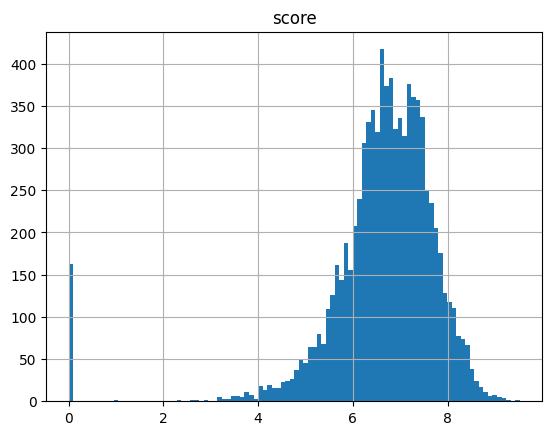

In [26]:
df_merge.hist(column="score", bins = 100)

18. Muestre la densidad de puntajes para los principales tipos de anime (TV, OVA, Movie)

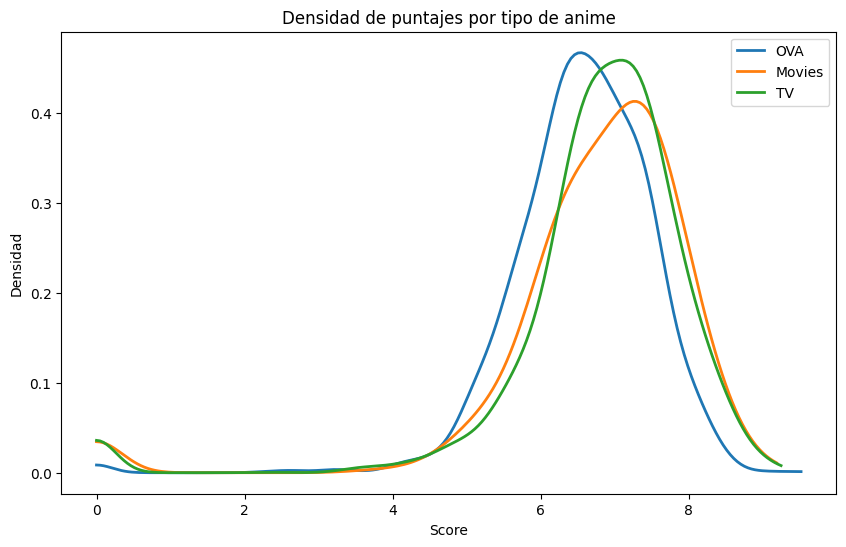

In [32]:
from scipy import stats

scores_ova = df_merge[(df_merge.type == "OVA")]
scores_ova = scores_ova["score"]

scores_movies = df_merge[(df_merge.type == "Movie")]
scores_movies = scores_movies["score"]

scores_tv = df_merge[(df_merge.type == "TV")]
scores_tv = scores_tv["score"]

density_ova = stats.gaussian_kde(scores_ova)
density_movies = stats.gaussian_kde(scores_movies)
density_tv = stats.gaussian_kde(scores_tv)

xs_ova = np.linspace(scores_ova.min(), scores_ova.max(), 200)
xs_tv = np.linspace(scores_tv.min(), scores_tv.max(), 200)
xs_movies = np.linspace(scores_movies.min(), scores_movies.max(), 200)

density_ova_values = density_ova(xs_ova)
density_movie_values = density_movies(xs_movies)
density_tv_values = density_tv(xs_tv)

plt.figure(figsize=(10, 6))
plt.plot(xs_ova, density_ova_values, linewidth=2, label="OVA")
plt.plot(xs_movies, density_movie_values, linewidth=2, label="Movies")
plt.plot(xs_tv, density_tv_values, linewidth=2, label="TV")
plt.xlabel("Score")
plt.ylabel("Densidad")
plt.title("Densidad de puntajes por tipo de anime")
plt.legend()




19. ¿Cuál tipo de anime es más exitoso? ¿Se está tomando en cuenta la cantidad de animes por tipo al afirmar eso?

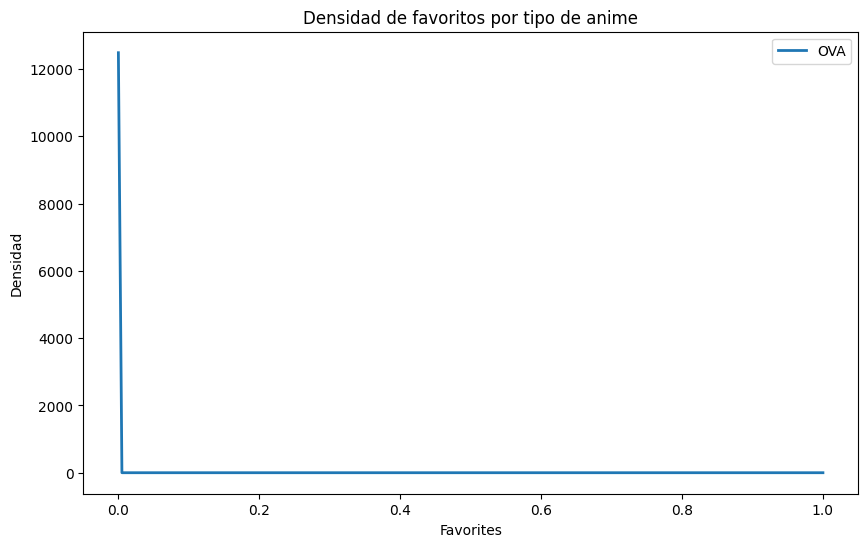

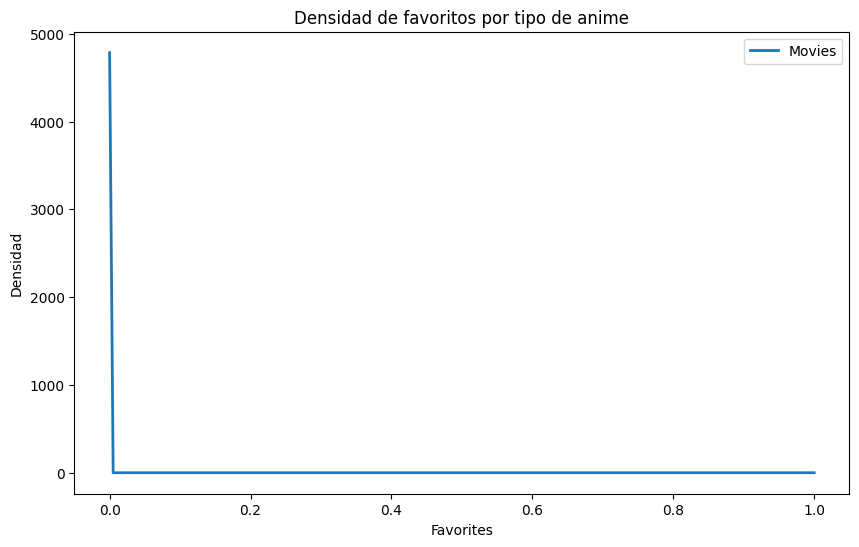

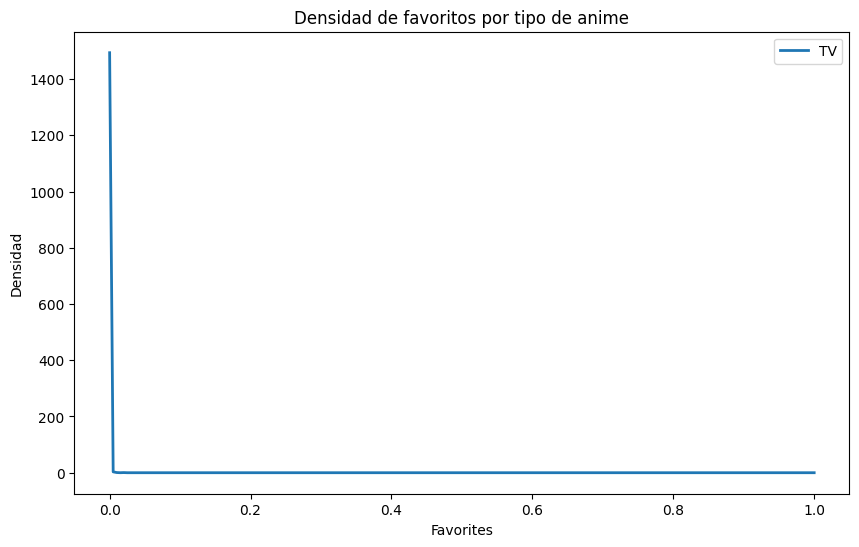

In [33]:
from scipy import stats

favorites_ova = df_merge[(df_merge.type == "OVA")]
favorites_ova = favorites_ova["favorites"]

favorites_movies = df_merge[(df_merge.type == "Movie")]
favorites_movies = favorites_movies["favorites"]

favorites_tv = df_merge[(df_merge.type == "TV")]
favorites_tv = favorites_tv["favorites"]

total_tv, total_movies, total_ova = favorites_tv.sum(), favorites_movies.sum(), favorites_ova.sum()

total = total_tv + total_movies + total_ova

favorites_tv = favorites_tv.div(total)
favorites_ova = favorites_ova.div(total)
favorites_movies = favorites_movies.div(total)

density_ova = stats.gaussian_kde(favorites_ova)
density_movies = stats.gaussian_kde(favorites_movies)
density_tv = stats.gaussian_kde(favorites_tv)

xs_ova = np.linspace(0, 1, 200)
xs_tv = np.linspace(0,1, 200)
xs_movies = np.linspace(0,1, 200)

density_ova_values = density_ova(xs_ova)
density_movie_values = density_movies(xs_movies)
density_tv_values = density_tv(xs_tv)

plt.figure(figsize=(10, 6))
plt.plot(xs_ova, density_ova_values, linewidth=2, label="OVA")
plt.xlabel("Favorites")
plt.ylabel("Densidad")
plt.title("Densidad de favoritos por tipo de anime")
plt.legend()


plt.figure(figsize=(10, 6))
plt.plot(xs_movies, density_movie_values, linewidth=2, label="Movies")
plt.xlabel("Favorites")
plt.ylabel("Densidad")
plt.title("Densidad de favoritos por tipo de anime")
plt.legend()


plt.figure(figsize=(10, 6))
plt.plot(xs_tv, density_tv_values, linewidth=2, label="TV")
plt.xlabel("Favorites")
plt.ylabel("Densidad")
plt.title("Densidad de favoritos por tipo de anime")
plt.legend()

R: Al analizar las gráficas obtenidas en la pregunta anterior, se observa que la densidad de las películas presenta un puntaje superior en comparación con la densidad de los demás animes. Por lo tanto, si basamos el éxito de un anime basado en la crítica obtenemos que el tipo de anime más exitoso corresponde a las películas. En este análisis se considera la cantidad de animes por tipo y su score. Luego si consideramos el éxito basado en favoritos notamos que son pocos los animes que consiguen un alto valor en favoritos. La mayoría de los animes tienen pocos favoritos y representan una curva similar, sin embargo aquel que destaca son los animes de TV donde no concentra tantos como los demás tipos al inicio (con pocos favoritos).

Y eso es todo por hoy :)


![](https://i.imgur.com/ghKLs78.jpeg)